In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
settle= pd.read_excel('settlement.xlsx')
emp=pd.read_excel('employee.xlsx')

In [4]:
emp

,Active Employee,Employee ID,Title,Office,Department,Hire Date
0,Yes,0051J000004ba0z,Attorney,Chicago,Workers Comp,2018-04-02
1,Yes,0051J000004bboC,Paralegal,Chicago,Workers Comp,2018-04-07
2,Yes,0051J000004bbqS,Attorney,Detroit,Workers Comp,2018-04-08
3,Yes,0051J000004bbqX,Attorney,Detroit,Workers Comp,2018-04-08
4,No,0051J000004bbvw,Paralegal,Chicago,Workers Comp,2018-04-09
...,...,...,...,...,...,...
1109,Yes,005o0000003WdHx,Attorney,Detroit,Personal Injury,2014-10-19
1110,Yes,005o0000003WXn1,Attorney,Dallas,Personal Injury,2015-08-10
1111,Yes,005o0000004FZB7,Attorney,Chicago,ELG,2017-04-25
1112,Yes,005o0000004gHCj,Attorney,Kansas City,Personal Injury,2016-02-07


In [5]:
settle

,Case Number,Signup Date,Resolution Date,Handling Attorney: Employee ID,Handling Attorney Name,Handling Paralegal: Employee ID,Handling Paralegal Name,Settlement Amount,Case Expenses
0,CASE-351093,2020-12-21,2021-08-23,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,5040.00,732
1,CASE-352994,2020-10-19,2021-08-30,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,4128.00,1090
2,CASE-215014,2020-05-21,2021-01-26,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,7200.00,891
3,CASE-258435,2020-04-28,2021-03-29,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,4800.00,1227
4,CASE-262572,2020-05-05,2021-04-19,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,5760.00,1098
...,...,...,...,...,...,...,...,...,...
46911,CASE-347338,2020-06-28,2021-07-30,0051J000004XnRL,Derrick Molandes,0051J000006bUmb,Stephanie Mason,3333.33,1236
46912,CASE-348190,2020-07-12,2021-06-23,0051J000004XnRL,Derrick Molandes,0051J000006bUmb,Stephanie Mason,3333.33,1003
46913,CASE-353309,2020-12-11,2021-08-30,0051J000004XnRL,Derrick Molandes,005o0000002YYYn,Fernanda McDonald,3333.33,1256
46914,CASE-353611,2020-11-27,2021-07-23,0051J000004XnRL,Derrick Molandes,005o0000002YYYn,Fernanda McDonald,5000.00,1320


In [48]:
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]
growth['year']=pd. DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).year
growth['revenue']=growth['Settlement Amount']-growth['Case Expenses']
growth

,Resolution Date,Case Expenses,Settlement Amount,Department,Office,year,revenue
0,2020-03-31,2197,6666.660,Workers Comp,Chicago,2020,4469.660
1,2020-03-31,1142,4666.660,Workers Comp,Chicago,2020,3524.660
2,2020-03-31,1636,6666.660,Workers Comp,Chicago,2020,5030.660
3,2020-03-31,3913,10000.000,Workers Comp,Chicago,2020,6087.000
4,2020-05-11,2658,6666.660,Workers Comp,Chicago,2020,4008.660
...,...,...,...,...,...,...,...
46911,2021-07-15,1360,13200.000,Personal Injury,Kansas City,2021,11840.000
46912,2021-07-15,204,799.992,Personal Injury,Kansas City,2021,595.992
46913,2021-07-22,4446,39999.996,Personal Injury,Kansas City,2021,35553.996
46914,2021-07-27,2820,13200.000,Personal Injury,Kansas City,2021,10380.000


<AxesSubplot:xlabel='Department,year'>

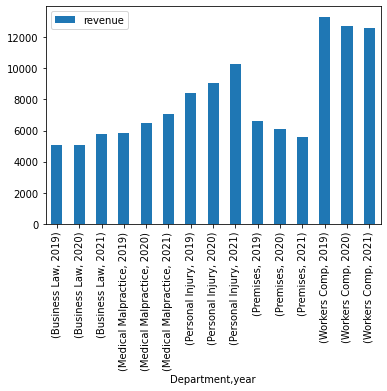

In [45]:
revenue=growth[['revenue','year','Department']].groupby(['Department','year']).mean()
revenue.plot(kind='bar')

In [111]:
expenses=pd.melt(growth[['Case Expenses','year','Department']].groupby(['Department','year']).mean().T)
expenses.head(5)

,Department,year,value
0,Business Law,2019,7581.247448
1,Business Law,2020,7826.965902
2,Business Law,2021,9095.051711
3,Medical Malpractice,2019,2517.737203
4,Medical Malpractice,2020,2792.480585


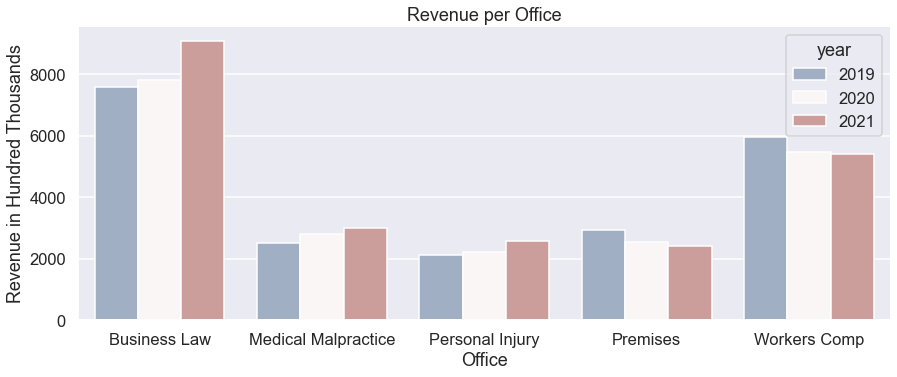

In [114]:
sns.set('talk')
ax=sns.catplot(x='Department',y='value',hue='year',data=expenses,kind='bar',aspect=2.5,palette="vlag", legend_out=False)\
.set(ylabel='Revenue in Hundred Thousands', xlabel='Office', title='Revenue per Office')

In [109]:
of_rev=pd.melt(growth[['year', 'Office','revenue']].groupby(["Office",'year']).sum().T)
of_rev['value']=round(of_rev['value'].astype('int64')/100000,2)
of_rev.head(5)

,Office,year,value
0,Boston,2019,32.90
1,Boston,2020,34.20
2,Boston,2021,32.65
3,Chicago,2019,239.53
4,Chicago,2020,218.04


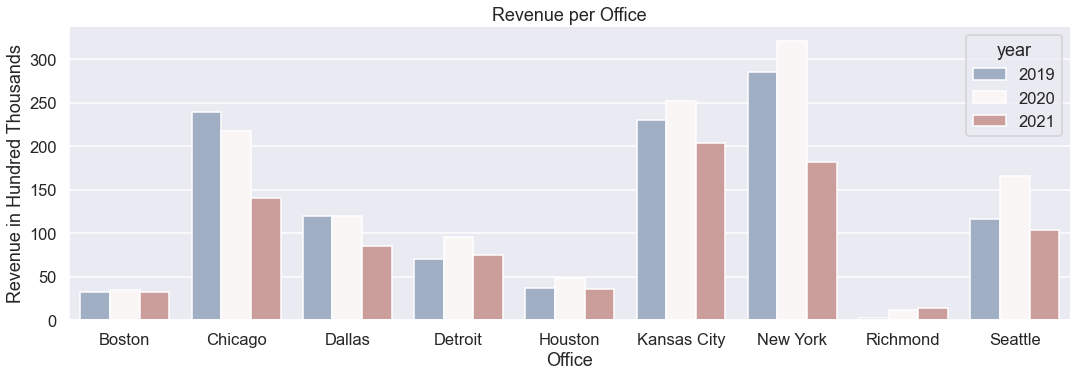

In [108]:
sns.set('talk')
ax=sns.catplot(x='Office',y='value',hue='year',data=of_rev,kind='bar',aspect=2.5,palette="vlag", legend_out=False)\
.set(ylabel='Revenue in Hundred Thousands', xlabel='Office', title='Revenue per Office')